# Juliaによる数値計算

## データの可視化

ここでは Julia のデータ可視化を行うために **Plots.jl** パッケージを使ってみる

[00_math-basic.ipynb](./00_math-basic.ipynb) でインストールしてあるはずだが、未導入であれば導入しておく

In [1]:
using Pkg

Pkg.DEFAULT_IO[] = stdout
Pkg.add("Plots")

    Updating registry at `~/.julia/registries/General`
   Resolving package versions...
  No Changes to `~/github/julia_ml-tuto/Project.toml`
  No Changes to `~/github/julia_ml-tuto/Manifest.toml`


### 折れ線グラフ
まずは以下のような人工的なデータについて、$x$ と $y$ の関係を表す折れ線グラフを描いてみる

$$
\begin{array}{c|cccc}
x & 0 & 1 & 2 & 3 \\\hline
y & 3 & 7 & 4 & 8
\end{array}
$$

折れ線グラフは `Plots.plot(x::Vector, y::Vector; ...)` で描くことが出来る

詳細を確認したい場合は [公式マニュアル](https://docs.juliaplots.org/latest/) を参照すること

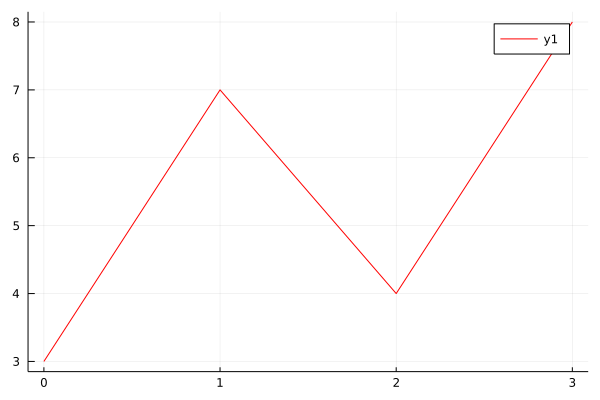

In [2]:
# Plots.jl を利用
using Plots

x = [0, 1, 2, 3]
y = [3, 7, 4, 8]

# グラフ線: 赤色 で x, y の折れ線グラフを描く
## 指定可能なグラフ属性は https://docs.juliaplots.org/latest/generated/attributes_series/ を参照
plot(x, y; color=:red)

### 散布図
同じデータで散布図を描いてみる

散布図を描きたい場合は `seriestype` キーワード引数に `:scatter` を指定すれば良い

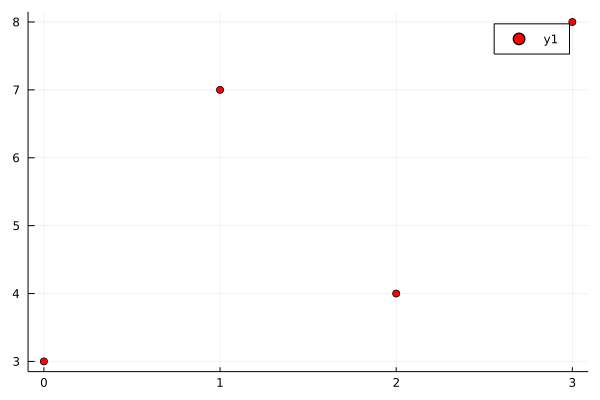

In [3]:
plot(x, y; seriestype=:scatter, color=:red)

### 曲線のグラフ
Plots.jl は、人工データだけでなく、関数をそのまま描画することも可能である

これを利用して曲線のグラフを描くことも出来る

例えば $f(x) = x^2$ という曲線関数を描画してみる

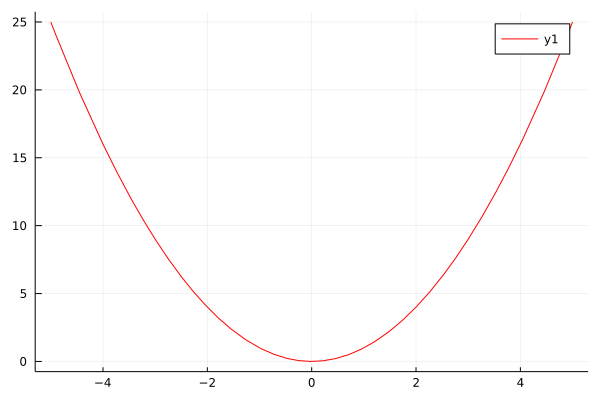

In [4]:
f(x) = x^2
plot(f; color=:red)

### 複数の線を表示
1つのグラフの中に複数のグラフを描画したい場合は `Plots.plot!` 関数を用いると良い

この関数は、`Plots.plot` で描いたグローバルなグラフに追加してグラフを描くための関数である

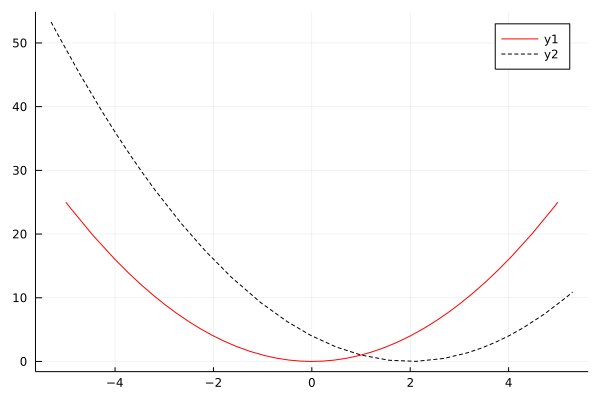

In [5]:
# x座標
x = -5:5

# 関数1
f(x) = x^2

# 関数2
g(x) = (x - 2)^2

# 関数1を描画
plot(f; color=:red)

# 関数2を plot で描いたグラフに重ねて描画
plot!(g; color=:black, linestyle=:dash)

### ヒストグラム
ヒストグラムを描きたい場合は `seriestype` キーワード引数に `:histogram` を指定する

ここでは、「サイコロを10回振って目の合計を計算する」という処理を1000回行ったときの、目の合計の分布を表すヒストグラムを描いてみる

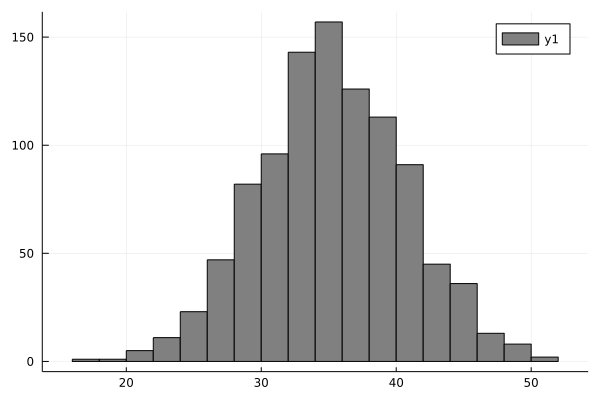

In [6]:
using Random

# 毎回同じ結果が得られるように、乱数の種を 0 固定で初期化
Random.seed!(0)

# 目の合計値を保持する配列
l = []

for _ = 1:1000
    # 10回サイコロを振ったときの目の合計値を l に保持
    push!(l, rand(1:6, 10) |> sum)
end

# ヒストグラムの描画
plot(l; seriestype=:histogram, color=:gray)

### 棒グラフ・円グラフ
同様に、棒グラフや円グラフを描画したい場合は `seriestype` キーワード引数に `:bar` や `:pie` を指定すれば良い

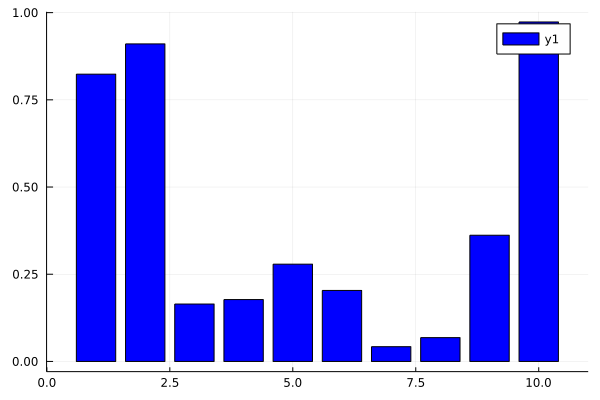

In [7]:
# 毎回同じ結果が得られるように、乱数の種を 0 固定で初期化
Random.seed!(0)

# 10個のランダムな数を生成
data = rand(10)

# 棒グラフを描画
plot(data; seriestype=:bar, color=:blue)

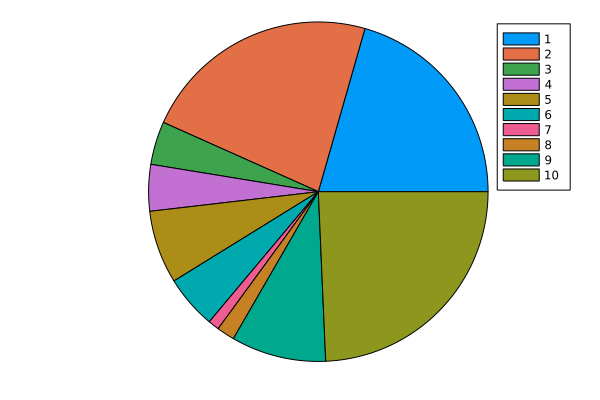

In [8]:
# 円グラフを描画
plot(data; seriestype=:pie)

### 複数のグラフを並べて表示
`Plots.plot` 関数は `Plots.plot` の戻り値を引数にとることが出来る

複数の `Plots.plot` 戻り値を引数にとることで、複数のグラフを並べて表示することが出来る

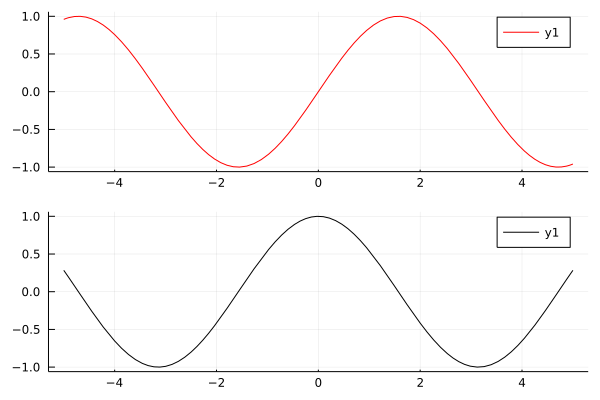

In [9]:
# sinカーブのグラフを作成
sin_graph = plot(sin; color=:red)

# cosカーブのグラフを作成
cos_graph = plot(cos; color=:black)

# 上記2つのグラフを並べて描画
## layout キーワード引数で row x col のグリッド状に並べることが出来る
plot(sin_graph, cos_graph; layout=(2, 1))

### 3D系グラフ
ここまでは1変数関数のグラフを見てきたが、2変数関数の3Dグラフを描くことも出来る

基本的には、これまで同様 `seriestype` キーワード引数を指定することで制御することが出来るが、以下のようなグラフは専用の関数が用意されている

- ヒートマップ図
    - `Plots.plot(...; seriestype=:heatmap)`
    - 専用関数: `Plots.heatmap(...)`
- コンター図（等高線）
    - `Plots.plot(...; seriestype=:contour)`
    - 専用関数: `Plots.contour(...)`
- ワイヤーフレーム図
    - `Plots.plot(...; seriestype=:wireframe)`
    - 専用関数: `Plots.wireframe(...)`
- 曲面図
    - `Plots.plot(...; seriestype=:surface)`
    - 専用関数: `Plots.surface(...)`

なお、3D系グラフを描画する際は基本的に x, y 座標範囲を指定すること

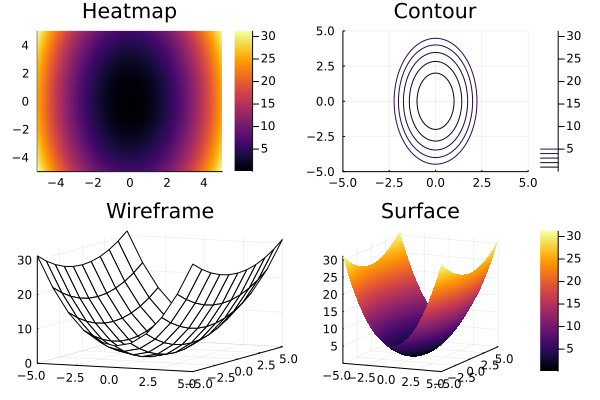

In [10]:
# 2変数関数
f(x, y) = x^2 + y^2 / 4

# x, y 座標範囲
## range(初項, 最終項; step=等差, length=(最終項-初項)÷等差)
x_range = range(-5, 5; length=300)
y_range = range(-5, 5; length=300)

# 各3D系グラフを描画
p1 = heatmap(x_range, y_range, f; title="Heatmap")
p2 = contour(x_range, y_range, f; title="Contour", levels=[1, 2, 3, 4, 5]) # levels で等高線のレベルを指定可能
p3 = wireframe(-5:5, -5:5, f; title="Wireframe") # ワイヤーフレームの場合は x, y 座標範囲の等差を細かくし過ぎないほうが良い
p4 = surface(x_range, y_range, f; title="Surface")

# 上記グラフを 2x2 に並べて描画
## Plots.jl のデフォルトフォーマットは SVG だが、重くなりやすいため PNG フォーマットで出力したほうが良い場合もある
plot(p1, p2, p3, p4; layout=(2, 2), fmt=:png)